In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Load datasets

%matplotlib inline

training_df = pd.read_csv('data/credit-data-training.csv' )

# Show df to get an idea of the data
training_df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [3]:
customers_df = pd.read_csv('data/customers-to-score.csv')
# Show df to get an idea of the data
customers_df.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1


## Exploring the training dataset

In [4]:
training_df = training_df.drop_duplicates()
training_df.shape

(500, 20)

In [5]:
# nulls = []
nulls = training_df.isnull().sum(axis = 0).reset_index()
nulls.columns = ['column name', '#nulls']
nulls

,column name,#nulls
0,Credit-Application-Result,0
1,Account-Balance,0
2,Duration-of-Credit-Month,0
3,Payment-Status-of-Previous-Credit,0
4,Purpose,0
5,Credit-Amount,0
6,Value-Savings-Stocks,0
7,Length-of-current-employment,0
8,Instalment-per-cent,0
9,Guarantors,0


In [6]:
# Showing number of distinct values per column - for detecting low variability columns
distinc_values = training_df.nunique(axis=0).reset_index()
distinc_values.columns = ['column name', '#distinct values']
distinc_values

,column name,#distinct values
0,Credit-Application-Result,2
1,Account-Balance,2
2,Duration-of-Credit-Month,30
3,Payment-Status-of-Previous-Credit,3
4,Purpose,4
5,Credit-Amount,464
6,Value-Savings-Stocks,3
7,Length-of-current-employment,3
8,Instalment-per-cent,4
9,Guarantors,2


In [249]:
training_clean = training_df
training_clean = training_clean.drop(['Concurrent-Credits', 'Occupation', 'Duration-in-Current-address', 'Telephone', 'Foreign-Worker', 'No-of-dependents'], axis=1)
# [['Credit-Application-Result', 'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit', 'Purpose', 'Credit-Amount', 'Value-Savings-Stocks', 'Length-of-current-employment', ]]

training_clean['Credit-Application-Result'] = training_clean['Credit-Application-Result'].apply(lambda x: 1 if (x=='Creditworthy') else 0)
# training_clean['Guarantors'] = training_clean['Guarantors'].apply(lambda x: 1 if (x=='Yes') else 0)

fill_mean = lambda col:col.fillna(col.mean())
training_clean['Age-years'] = training_clean['Age-years'].fillna(training_clean['Age-years'].median())
training_clean.isnull().sum(axis = 0).reset_index()


initial_columns = training_clean.columns


In [250]:
training_clean.skew()

Credit-Application-Result       -0.960891
Duration-of-Credit-Month         0.991000
Credit-Amount                    2.108522
Instalment-per-cent             -0.596533
Most-valuable-available-asset    0.013780
Age-years                        1.102038
Type-of-apartment               -0.056348
dtype: float64

Text(0, 0.5, 'Individuals')

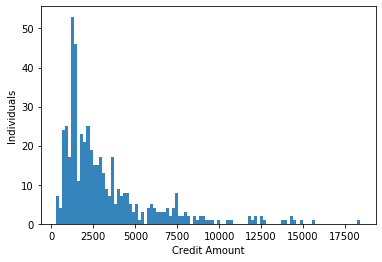

In [251]:
ax = training_clean['Credit-Amount'].plot.hist(bins=100, alpha=0.9)
ax.set_xlabel("Credit Amount")
ax.set_ylabel("Individuals")

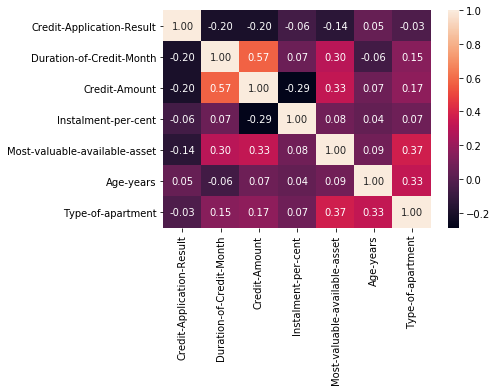

In [252]:
ax = sns.heatmap(training_clean.corr(), annot=True, fmt=".2f")

In [253]:
training_clean = pd.get_dummies(training_clean)
training_clean 

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),...,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Guarantors_None,Guarantors_Yes,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1,4,1494,1,1,33.0,2,0,1,0,...,0,0,1,0,0,1,1,0,1,0
1,1,4,1494,1,1,29.0,2,0,1,0,...,0,0,1,0,0,1,1,0,1,0
2,1,4,1544,2,1,42.0,2,0,1,1,...,0,1,0,1,0,0,1,0,0,1
3,1,4,3380,1,1,37.0,2,0,1,1,...,0,1,0,1,0,0,1,0,1,0
4,1,6,343,4,1,27.0,2,1,0,0,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,60,7418,1,1,33.0,2,1,0,1,...,0,0,1,0,0,1,1,0,1,0
496,1,60,7418,1,1,27.0,2,1,0,1,...,0,0,1,0,0,1,1,0,1,0
497,1,60,9157,2,4,27.0,3,1,0,1,...,0,0,1,0,0,1,1,0,1,0
498,1,60,13756,2,4,63.0,3,0,1,1,...,0,0,1,0,1,0,1,0,1,0


In [254]:
#Computing the p-values for the cleaned training set (with dummies)

p_values= pd.DataFrame(columns=['column-name', 'p-value']) 

def p_value_computation(col):
    c , p = pearsonr(training_clean['Credit-Application-Result'], training_clean[col])
    return p

for idx_col in range(len(training_clean.columns)):
    col_name = training_clean.columns[idx_col]
    pv = p_value_computation(col_name)
    df = {'column-name': col_name, 'p-value': pv}
#     if (p_value_computation(col_name)<=0.05):
    p_values = p_values.append(df, ignore_index=True)
#     print(str(idx_col)+".\t"+col_name+': p-value='+ str(pv)) 
#     print(df)


In [255]:
p_values 

,column-name,p-value
0,Credit-Application-Result,0.000000e+00
1,Duration-of-Credit-Month,5.015063e-06
2,Credit-Amount,5.331082e-06
3,Instalment-per-cent,1.655599e-01
4,Most-valuable-available-asset,1.533356e-03
5,Age-years,2.375798e-01
6,Type-of-apartment,5.541686e-01
7,Account-Balance_No Account,4.606668e-13
8,Account-Balance_Some Balance,4.606668e-13
9,Payment-Status-of-Previous-Credit_No Problems ...,1.261846e-03


In [256]:
column = 'Age-years'#'Total Sales'
def col_outliers(df, col_name):
    iq1, iq2, iq3 = df[col_name].quantile([0.25,0.5,0.75])
    IQR = iq3 - iq1
    uf = iq3 + 1.5 * IQR
    lf = iq1 - 1.5 * IQR
    print ("upper fence = {0}, lower fence {1} ".format(uf, lf) )
    return df[(df[column]<lf) |(df[column]>uf)]

outliers = col_outliers(training_clean, column)

# training_clean= training_clean.drop(outliers.index) #[[:,:]]
# training_clean.shape

upper fence = 62.0, lower fence 6.0 


(481, 26)

In [257]:
df = {'column-name': col_name, 'p-value': pv}

def median_p_val_for_cateogrical(col):
 
    dummy_p_vals = pd.DataFrame(p_values[p_values['column-name'].str.match(col)])
    mean = dummy_p_vals['p-value'].mean()
    return mean

# median_p_val_for_cateogrical('Foreign-Worker')

In [258]:
init_col_names_p_vals = pd.DataFrame(columns = p_values.columns)
for idx_col in range(len(initial_columns)):
    col_name = initial_columns[idx_col]
    mean = median_p_val_for_cateogrical(col_name)
    df = {'column-name': col_name, 'p-value': mean}
#     print (df)
    init_col_names_p_vals = init_col_names_p_vals.append(df, ignore_index=True)

In [259]:
init_col_names_p_vals

,column-name,p-value
0,Credit-Application-Result,0.000000e+00
1,Account-Balance,4.606668e-13
2,Duration-of-Credit-Month,5.015063e-06
3,Payment-Status-of-Previous-Credit,2.731960e-01
4,Purpose,2.539827e-01
5,Credit-Amount,5.331082e-06
6,Value-Savings-Stocks,1.947024e-01
7,Length-of-current-employment,1.171738e-01
8,Instalment-per-cent,1.655599e-01
9,Guarantors,3.250066e-01


In [260]:
init_col_names_p_vals = init_col_names_p_vals.drop_duplicates(keep='first')
init_col_names_p_vals[init_col_names_p_vals['p-value']<0.05]

,column-name,p-value
0,Credit-Application-Result,0.000000e+00
1,Account-Balance,4.606668e-13
2,Duration-of-Credit-Month,5.015063e-06
5,Credit-Amount,5.331082e-06
10,Most-valuable-available-asset,1.533356e-03


In [262]:

training_set_columns = init_col_names_p_vals[init_col_names_p_vals['p-value']<0.05]['column-name'].reset_index()
training_set_columns = training_set_columns.drop(['index'], axis = 1)
training_set_columns

,column-name
0,Credit-Application-Result
1,Account-Balance
2,Duration-of-Credit-Month
3,Credit-Amount
4,Most-valuable-available-asset


In [352]:
def find_columns_starting_with (df, start):
    result = pd.DataFrame()
    cols = df.filter(regex='^'+start,axis=1)
    result = pd.concat([result, cols], axis=1, sort=False)
    return result

# building the clean training dataset (still containing outliers)
training_set = pd.DataFrame()
for i in range(len(training_set_columns)):
    col_name = str(training_set_columns['column-name'].iloc[i])
    cols = find_columns_starting_with(training_clean, col_name)
    training_set = pd.concat([training_set, cols], axis=1, sort=False)
    
training_set.shape

(481, 6)

## 0. Prepare training and test data

In [362]:
from sklearn.model_selection import train_test_split

y_values = training_set['Credit-Application-Result']
X_values = training_set.drop(['Credit-Application-Result'], axis = 1 )

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.3, random_state=42)

# # training_set.shape
# X_train.shape
y_train.shape
# X_test.shape
# y_test.shape

(336,)

In [494]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, recall_score

def del_training_test_columns (columns):
    new_X_train = X_train.drop(columns, axis = 1 )
    new_X_test = X_test.drop(columns, axis = 1 )
    return new_X_train, new_X_test, y_train, y_test

def print_report (y_test_m, y_predict ):
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_m, y_predict))

    print("Classification Report")
    print(classification_report(y_test_m, y_predict))
    
    print("Accuracy: "+str(accuracy_score(y_test_m, y_predict, normalize= True)))
    print("Recall: "+str(recall_score(y_test_m, y_predict)))

    
def output_important_features(model, features):
    # get importance
    importance = model.feature_importances_
    plot_importance(importance, features)

def plot_importance(importance, features):
    for i,v in enumerate(importance):
        print('Feature {0}: {1}, Score: {2}'.format (i, features[i],v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    


# compute with formulas from the theory
def compute_rSq_adjRSq (model, X, y, yhat):
    yhat = model.predict(X)
    SS_Residual = sum((y-yhat)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return r_squared, adjusted_r_squared

def compute_abs_errors (test_labels, predictions):
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    return errors

def compute_mae(test_labels,predictions):
    # Calculate the absolute errors
    errors = compute_abs_errors (test_labels,predictions)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    return errors
    
def compute_accuracy(test_labels, predictions):
    # Calculate mean absolute percentage error (MAPE)
    errors = compute_abs_errors(test_labels, predictions)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    return accuracy

def classification_labels(df):
    new_labels = df['predictions'].apply(lambda x : 1 if (x >= 0.5) else 0)
    return new_labels

## 1. Logistic Regression

In [495]:
from sklearn.linear_model import LinearRegression, LogisticRegression

X_train_lr, X_test_lr, y_train_lr, y_test_lr = del_training_test_columns([ 'Credit-Amount'])

lr = LogisticRegression().fit(X_train_lr, y_train_lr)
y_predict_lr = lr.predict(X_test_lr)
compute_mae(y_test_lr,y_predict_lr)

lr.score(X_test_lr, y_test_lr)

Mean Absolute Error: 0.21 degrees.


0.7862068965517242

Confusion Matrix:
[[16 24]
 [ 7 98]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.40      0.51        40
           1       0.80      0.93      0.86       105

    accuracy                           0.79       145
   macro avg       0.75      0.67      0.69       145
weighted avg       0.77      0.79      0.77       145

Accuracy: 0.7862068965517242
Recall: 0.9333333333333333
Feature 0: Account-Balance_No Account, Score: -0.764732213636056
Feature 1: Account-Balance_Some Balance, Score: 0.7647423240722003
Feature 2: Duration-of-Credit-Month, Score: -0.022802843638567525
Feature 3: Most-valuable-available-asset, Score: -0.24526780198998355


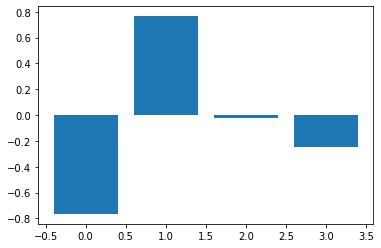

In [496]:
print_report(y_test_lr, y_predict_lr)

# get importance
importance = lr.coef_[0]

plot_importance (importance, X_train_lr.columns)

## 2. Decision Tree Classification

In [497]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-lea

X_train_dt, X_test_dt, y_train_dt, y_test_dt = del_training_test_columns([]) 

# f1-score is 0.66 without 'Account-Balance_No Account', 'Account-Balance_Some Balance'  

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)

# Train Decision Tree Classifer
clf = clf.fit(X_train_dt,y_train_dt)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test_dt)
compute_mae(y_test_dt,y_pred_dt)
# compute_accuracy(y_test_dt,y_pred_dt)
clf.score(X_test_dt, y_test_dt)


Mean Absolute Error: 0.26 degrees.


0.7448275862068966

Confusion Matrix:
[[23 17]
 [20 85]]
Classification Report
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        40
           1       0.83      0.81      0.82       105

    accuracy                           0.74       145
   macro avg       0.68      0.69      0.69       145
weighted avg       0.75      0.74      0.75       145

Accuracy: 0.7448275862068966
Recall: 0.8095238095238095
Feature 0: Account-Balance_No Account, Score: 0.09179244428563701
Feature 1: Account-Balance_Some Balance, Score: 0.0
Feature 2: Duration-of-Credit-Month, Score: 0.19619320616608382
Feature 3: Credit-Amount, Score: 0.5214509760859555
Feature 4: Most-valuable-available-asset, Score: 0.19056337346232374


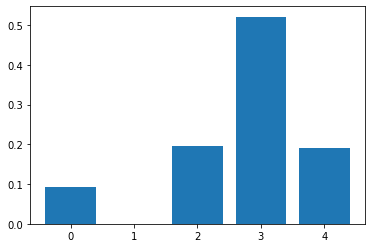

In [498]:
print_report(y_test_dt, y_pred_dt)
output_important_features (clf, X_train_dt.columns)

## 3. Random Forest Model

In [499]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
 
X_train_rf, X_test_rf, y_train_rf, y_test_rf = del_training_test_columns([])
# f1 - score without 'Account-Balance_No Account', 'Account-Balance_Some Balance' is 0.69
# f1 - score without 'Most-valuable-available-asset' is 0.73
# f1 - score with all is 0.78

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier( n_estimators = 1000, random_state = 1)
# Train the model on training data
rf.fit(X_train_rf, y_train_rf)
y_predict_rf = rf.predict(X_test_rf)

compute_mae(y_test_rf,y_predict_rf)
rf.score(X_test_rf, y_test_rf)

Mean Absolute Error: 0.22 degrees.


0.7793103448275862

Confusion Matrix:
[[20 20]
 [12 93]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        40
           1       0.82      0.89      0.85       105

    accuracy                           0.78       145
   macro avg       0.72      0.69      0.70       145
weighted avg       0.77      0.78      0.77       145

Accuracy: 0.7793103448275862
Recall: 0.8857142857142857
Feature 0: Account-Balance_No Account, Score: 0.053067444548733245
Feature 1: Account-Balance_Some Balance, Score: 0.05372842361109711
Feature 2: Duration-of-Credit-Month, Score: 0.21671245322851057
Feature 3: Credit-Amount, Score: 0.5630858862180168
Feature 4: Most-valuable-available-asset, Score: 0.11340579239364211


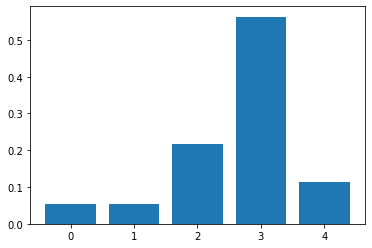

In [500]:
print_report(y_test_rf, y_predict_rf)
output_important_features (rf, X_train_rf.columns)

## 4. Boosting model

In [501]:
from sklearn.ensemble import GradientBoostingClassifier

X_train_gb, X_test_gb, y_train_gb, y_test_gb = del_training_test_columns(['Most-valuable-available-asset' ])

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=5, random_state=42)
gb_clf.fit(X_train_gb, y_train_gb) 

y_predict_gb = gb_clf.predict(X_test_gb)

compute_mae(y_test_gb,y_predict_gb)
gb_clf.score(X_test_gb, y_test_gb)

Mean Absolute Error: 0.24 degrees.


0.7586206896551724

In [502]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=5, random_state=1)
    gb_clf.fit(X_train_gb, y_train_gb) 
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_gb, y_train_gb)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_gb, y_test_gb)))
    
#     print("Accuracy:",metrics.accuracy_score(y_test, y_predict_gb))

Learning rate:  0.05
Accuracy score (training): 0.780
Accuracy score (validation): 0.738
Learning rate:  0.075
Accuracy score (training): 0.815
Accuracy score (validation): 0.759
Learning rate:  0.1
Accuracy score (training): 0.833
Accuracy score (validation): 0.738
Learning rate:  0.25
Accuracy score (training): 0.929
Accuracy score (validation): 0.745
Learning rate:  0.5
Accuracy score (training): 0.991
Accuracy score (validation): 0.745
Learning rate:  0.75
Accuracy score (training): 0.997
Accuracy score (validation): 0.731
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.786


Confusion Matrix:
[[20 20]
 [15 90]]
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        40
           1       0.82      0.86      0.84       105

    accuracy                           0.76       145
   macro avg       0.69      0.68      0.69       145
weighted avg       0.75      0.76      0.75       145

Accuracy: 0.7586206896551724
Recall: 0.8571428571428571
Feature 0: Account-Balance_No Account, Score: 0.0239100706979368
Feature 1: Account-Balance_Some Balance, Score: 0.09732886353991659
Feature 2: Duration-of-Credit-Month, Score: 0.2022278235919157
Feature 3: Credit-Amount, Score: 0.6765332421702309


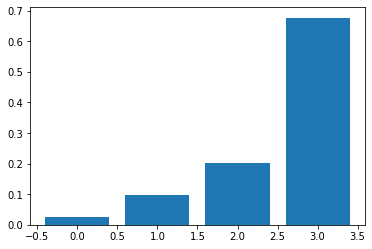

In [503]:
print_report(y_test_gb, y_predict_gb)
output_important_features (gb_clf, X_train_gb.columns)